## simulated anneling

metode gradien hanya bisa digunakan untuk fungsi yang mempunyai turunan dan kontinyu. Diperkenalkan metode Simulated annealing (SA) yaitu metode salah satu metode neighborhood search yang merupakan algoritma meta-heuristic. Simulated anneling (SA) adalah salah satu teknik optimasi global yang mengikuti fenomena alam yang disebut proses anneling.




Tujuan : untuk menghasilkan low-energy state pada sebuah material pada suatu lingkungan dengan T yang berbeda-beda.

Ada 2 tahap :
1. Temperatur lingkungan dinaikkan sampai tepat di bawah titik leleh material logam, pada saat ini partikel/molekul-molekul logam mulau disorganized dan sistem memiliki energi yang tinggi.

2. Temperatur lingkungan pelan-pelan diturunkan sampai partikel/molekul-molekul logam “mengatur dirinya sendiri” ke dalam state dengan energi yang minimum. Ini merupakan suatu proses minimisasi yang alami.

Probabilitas (menerima state Ej)

\begin{align*} 
Prob &= 1 \hspace{40mm}bila E_j ≤ E_i\\
Prob &= exp\left( \frac{{E_i−E_j}}{kbT} \right) \hspace{10mm}bila E_j > E_i
\end{align*}



NB: berbeda dengan metoda Steepest Descent, untuk pengambilan langkah lebih besar daripada langkah sebelumnya, metoda ini masih menerima kemungkinan tersebut. Sedangkan
pada metoda Steepest Descent kemungkinan tersebut akan langsung ditolak (P rob = 0).

### Algoritma


T (> 0) = Temperatur <br>
E = Panjang epoch. Banyaknya iterasi pada suatu nilai T <br>
r = Laju pendinginan  (o < r < 1)

### Library

In [4]:
import sys
%matplotlib notebook
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random
import math

### fungsi yang digunakan

In [439]:
def fx (x,y):
#     return (np.exp(x-y)-np.sin(x+y))
#     return(x**2+y**2-4)
#     return(((x**2+y**2)/50)-np.cos(x)*np.cos(y)+1)
#     return(x*y-1)
#     return(0.2 + x**2 + y**2 - 0.1*np.cos(6.0*3.1415*x) - 0.1*np.cos(6.0*3.1415*y))
    return((x**2)*(y**2)-np.cos(x+y))

### Parameter

In [440]:
T = 1000.
E = 100
k = 0
it = 1000
r = 0.9
interval_x = (-20, 20)
interval_y = (-20, 20)
m = 0.9
xx = []
yy = []
fc = []

x1 = interval_x[0] + (interval_x[1]-interval_x[0]) * random.random()
y1 = interval_y[0] + (interval_y[1]-interval_y[0]) * random.random()
xx.append(x1)
yy.append(y1)
print("nilai tebakan awal x= %s dan y= %s" %(np.around(x1,4),np.around(y1,4)))

nilai tebakan awal x= 3.5145 dan y= -7.1796


### main program

In [441]:
while(k!=it):
    for j in range(1,E):
        x2 = x1 + random.random()- 0.5
        x2 = max(min(x2,20.0),-20.0)
        y2 = y1 + random.random()- 0.5
        y2 = max(min(y2,20.0),-20.0)
        d = fx(x2,y2) - fx(x1,y1)
        if (d<=0):
            x1 = x2
            y1 = y2
            fc.append(fx(x1,y1))
            xx.append(x1)
            yy.append(y1)
        elif (random.random() < np.exp(-d/T)):
            x1 = x2
            y1 = y2
            xx.append(x1)
            yy.append(y1)
            fc.append(fx(x1,y1))
            
    k = k + 1
    T = r*T

In [442]:
print("nilai tebakan awal x= %s dan y= %s" %(np.around(x1,4),np.around(y1,4)))
print("nilai F(x,y)= %s" %(np.around(fx(x1,y1),4)))

nilai tebakan awal x= -0.0149 dan y= 0.0148
nilai F(x,y)= -1.0


### Plot contour dan posisi nilai solusi numerik

<IPython.core.display.Javascript object>


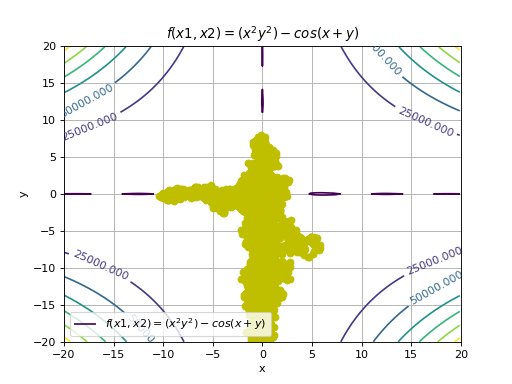

In [448]:
i1 = np.arange(-20.0, 20.0, 0.1)
i2 = np.arange(-20.0, 20.0, 0.1)
x1m, x2m = np.meshgrid(i1, i2)
fm = fx(x1m, x2m)

CS = plt.contour(x1m, x2m, fm)#,lines)
# Label contours
plt.clabel(CS, inline=1, fontsize=10)

fx3 = r'$f(x1,x2)=(x^{2}y^{2})-cos(x+y)$'
plt.title(fx3)
labels = [fx3]
CS.collections[0].set_label(labels[0])

# plt.plot(xx[0],yy[0],'y-o')
# plt.plot(xx[6826:6876],yy[6826:6876],'y-o')
plt.plot(xx,yy,'y-o')
# Add some text to the plot
plt.legend(loc='lower left')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.grid(True)
plt.show()
plt.savefig('contour.png')

### plot nilai objektif dan nilai solusi

<IPython.core.display.Javascript object>


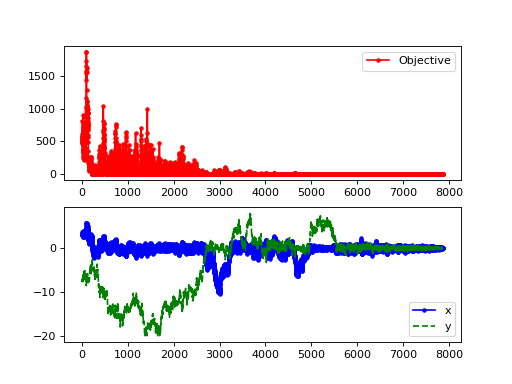

In [450]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(fc,'r.-')
ax1.legend(['Objective'])
ax2 = fig.add_subplot(212)
ax2.plot(xx,'b.-')
ax2.plot(yy,'g--')
ax2.legend(['x','y'])

# Save the figure as a PNG
plt.savefig('iterations.png')